# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [22]:
data = sns.load_dataset("mpg")
marks = ["bmw", "nissan", "subaru", "ford", "opel", "chevrolet", "honda", "volkswagen", "renault", "toyota", "fiat", "peugeot", "audi"]
rows = []
for i in range(len(data)):
    name = data.loc[i, "name"]
    for mark in marks:
        if mark in name:
            rows.append(data.iloc[i])
data = pd.DataFrame(rows)
data.drop([], axis=1, inplace=True)

data = data.loc[[171, 115, 118, 329, 109, 60]]
# data = data.sample(6)

data = data[["name", "weight", "horsepower", "model_year", "mpg"]]
data.rename(columns={"weight": "weight (lbs)"}, inplace=True)

links = [
    "https://pl.wikipedia.org/wiki/Toyota_Corona",
    "https://pl.wikipedia.org/wiki/Chevrolet_Monte_Carlo",
    "https://pl.wikipedia.org/wiki/Opel_Manta",
    "https://pl.wikipedia.org/wiki/Honda_Civic",
    "https://pl.wikipedia.org/wiki/Chevrolet_Vega",
    "https://pl.wikipedia.org/wiki/Chevrolet_Vega"
]
data["link"] = links

data.reset_index(drop=True, inplace=True)

data.loc[3, "horsepower"] = np.nan

data

,name,weight (lbs),horsepower,model_year,mpg,link
0,toyota corona,2702,96.0,75,24.0,https://pl.wikipedia.org/wiki/Toyota_Corona
1,chevrolet monte carlo s,4082,145.0,73,15.0,https://pl.wikipedia.org/wiki/Chevrolet_Monte_...
2,opel manta,2158,75.0,73,24.0,https://pl.wikipedia.org/wiki/Opel_Manta
3,honda civic 1500 gl,1850,NaN,80,44.6,https://pl.wikipedia.org/wiki/Honda_Civic
4,chevrolet vega,2401,72.0,73,21.0,https://pl.wikipedia.org/wiki/Chevrolet_Vega
5,chevrolet vega,2408,90.0,72,20.0,https://pl.wikipedia.org/wiki/Chevrolet_Vega


## Removing irrelevant data

In [23]:
data.drop(["link"], axis=1, inplace=True)
data

,name,weight (lbs),horsepower,model_year,mpg
0,toyota corona,2702,96.0,75,24.0
1,chevrolet monte carlo s,4082,145.0,73,15.0
2,opel manta,2158,75.0,73,24.0
3,honda civic 1500 gl,1850,NaN,80,44.6
4,chevrolet vega,2401,72.0,73,21.0
5,chevrolet vega,2408,90.0,72,20.0


## Removing duplicates

In [24]:
data.drop_duplicates(subset=["name"], inplace=True)
data

,name,weight (lbs),horsepower,model_year,mpg
0,toyota corona,2702,96.0,75,24.0
1,chevrolet monte carlo s,4082,145.0,73,15.0
2,opel manta,2158,75.0,73,24.0
3,honda civic 1500 gl,1850,NaN,80,44.6
4,chevrolet vega,2401,72.0,73,21.0


## Type conversion

In [25]:
from datetime import datetime

data["model_year"] = data['model_year'].transform(lambda x: datetime.strptime(f'19{str(x)}', '%Y'))

data

,name,weight (lbs),horsepower,model_year,mpg
0,toyota corona,2702,96.0,1975-01-01,24.0
1,chevrolet monte carlo s,4082,145.0,1973-01-01,15.0
2,opel manta,2158,75.0,1973-01-01,24.0
3,honda civic 1500 gl,1850,NaN,1980-01-01,44.6
4,chevrolet vega,2401,72.0,1973-01-01,21.0


## Units conversion

In [26]:
# mpg to l/100km
MPG_TO_L100KM = 235.214583

data['l/100km'] = (MPG_TO_L100KM / data['mpg']).round(2)
data.drop(["mpg"], axis=1, inplace=True)

# lbs to kg
data['weight (kg)'] = (data['weight (lbs)'] * 0.45359237).round(1)
data.drop(['weight (lbs)'], axis=1, inplace=True)
data = data[["name", "weight (kg)", "horsepower", "model_year", "l/100km"]]

data

,name,weight (kg),horsepower,model_year,l/100km
0,toyota corona,1225.6,96.0,1975-01-01,9.80
1,chevrolet monte carlo s,1851.6,145.0,1973-01-01,15.68
2,opel manta,978.9,75.0,1973-01-01,9.80
3,honda civic 1500 gl,839.1,NaN,1980-01-01,5.27
4,chevrolet vega,1089.1,72.0,1973-01-01,11.20


## Dealing with missing values

#### Mean

In [27]:
subset = data.copy()

mean = subset['horsepower'].mean()
subset.fillna(mean, inplace=True)
subset

,name,weight (kg),horsepower,model_year,l/100km
0,toyota corona,1225.6,96.0,1975-01-01,9.80
1,chevrolet monte carlo s,1851.6,145.0,1973-01-01,15.68
2,opel manta,978.9,75.0,1973-01-01,9.80
3,honda civic 1500 gl,839.1,97.0,1980-01-01,5.27
4,chevrolet vega,1089.1,72.0,1973-01-01,11.20


#### Median

In [28]:
subset = data.copy()

mean = subset['horsepower'].median()
subset.fillna(mean, inplace=True)
subset

,name,weight (kg),horsepower,model_year,l/100km
0,toyota corona,1225.6,96.0,1975-01-01,9.80
1,chevrolet monte carlo s,1851.6,145.0,1973-01-01,15.68
2,opel manta,978.9,75.0,1973-01-01,9.80
3,honda civic 1500 gl,839.1,85.5,1980-01-01,5.27
4,chevrolet vega,1089.1,72.0,1973-01-01,11.20


#### Mean vs. Median

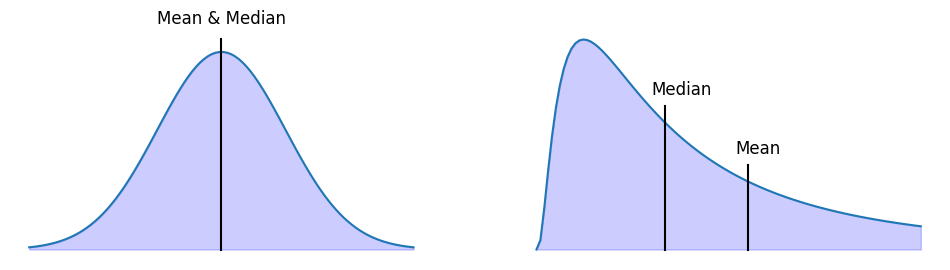

In [236]:
from scipy.stats import norm, lognorm

std = 3
x1 = np.linspace(-std, std, 100)
x2 = np.linspace(0, std, 100)
norm_dist = norm.pdf(x1)
log_norm_dist = lognorm.pdf(x2, 1)

fig, ax = plt.subplots(ncols=2, figsize=(12, 3))

ax[0].plot(x1, norm_dist)
ax[0].fill_between(x1, np.zeros(100), norm_dist, color="b", alpha=0.2)
ax[0].axis(False)
norm_mean = 0
ax[0].plot([norm_mean]*2, [0, norm.pdf(norm_mean) + 0.025], c="k")
ax[0].text(norm_mean, norm.pdf(norm_mean) + 0.05, "Mean & Median", ha="center", va="bottom", fontdict={"fontsize": 12})

ax[1].plot(x2, log_norm_dist)
ax[1].fill_between(x2, np.zeros(100), log_norm_dist, color="b", alpha=0.2)
ax[1].axis(False)
log_norm_mean = np.sqrt(np.e)
log_norm_median = 1
ax[1].plot([log_norm_mean]*2, [0, lognorm.pdf(log_norm_mean, 1) + 0.05], c="k")
ax[1].text(log_norm_mean-0.1, lognorm.pdf(log_norm_mean, 1) + 0.075, "Mean", ha="left", va="bottom", fontdict={"fontsize": 12})
ax[1].plot([log_norm_median]*2, [0, lognorm.pdf(log_norm_median, 1) + 0.05], c="k")
ax[1].text(log_norm_median-0.1, lognorm.pdf(log_norm_median, 1) + 0.075, "Median", ha="left", va="bottom", fontdict={"fontsize": 12})

plt.savefig("norm_and_lognorm.png", dpi=300)

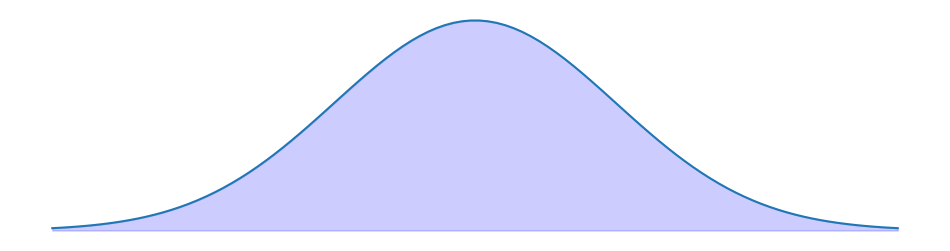

In [6]:
from scipy.stats import norm

std = 3
x = np.linspace(-std, std, 100)
norm_dist = norm.pdf(x)

plt.figure(figsize=(12, 3))

plt.plot(x, norm_dist)
plt.fill_between(x, np.zeros(100), norm_dist, color="b", alpha=0.2)
plt.axis(False)
# norm_mean = 0
# plt.plot([norm_mean]*2, [0, norm.pdf(norm_mean) + 0.025], c="k")
# plt.text(norm_mean, norm.pdf(norm_mean) + 0.05, "Mean & Median", ha="center", va="bottom", fontdict={"fontsize": 12})

plt.savefig("norm_dist_large.png", dpi=300)
# plt.show()

#### Generate random numbers

In [29]:
subset = data.copy()

mean = subset['horsepower'].mean()
std = subset['horsepower'].std()
subset.fillna(round(np.random.normal(loc=mean, scale=std), 1), inplace=True)
subset

,name,weight (kg),horsepower,model_year,l/100km
0,toyota corona,1225.6,96.0,1975-01-01,9.80
1,chevrolet monte carlo s,1851.6,145.0,1973-01-01,15.68
2,opel manta,978.9,75.0,1973-01-01,9.80
3,honda civic 1500 gl,839.1,128.2,1980-01-01,5.27
4,chevrolet vega,1089.1,72.0,1973-01-01,11.20


#### Linear regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

subset = data.copy()
subset.drop(["name"], axis=1, inplace=True)
model_year_mean = subset['model_year'].mean()
model_year_std = subset['model_year'].std()
subset['model_year'] = subset['model_year'].transform(lambda x: x.year)

X = subset.drop(["horsepower"], axis=1).to_numpy()
y = subset['horsepower'].to_numpy()
X_train = X[[0, 1, 2, 4]]
X_test = X[3]
y_train = y[[0, 1, 2, 4]]

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(np.expand_dims(X_test, axis=0))

linReg = LinearRegression().fit(X_train, y_train)
prediction = linReg.predict(X_test).round(1)[0]

subset = data.copy()
subset.fillna(prediction, inplace=True)
subset

,name,weight (kg),horsepower,model_year,l/100km
0,toyota corona,1225.6,96.0,1975-01-01,9.80
1,chevrolet monte carlo s,1851.6,145.0,1973-01-01,15.68
2,opel manta,978.9,75.0,1973-01-01,9.80
3,honda civic 1500 gl,839.1,27.9,1980-01-01,5.27
4,chevrolet vega,1089.1,72.0,1973-01-01,11.20


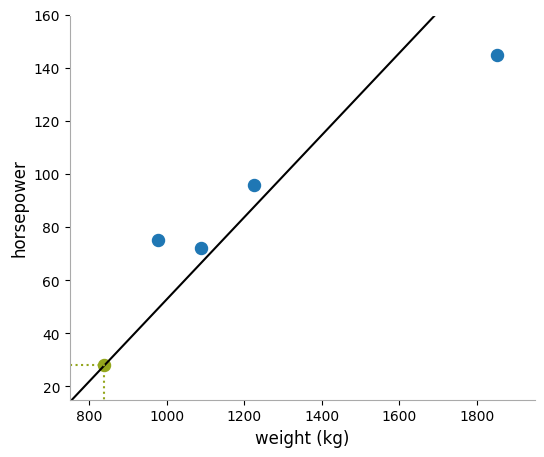

In [107]:
subset = data.copy()
subset.fillna(prediction, inplace=True)
train = subset.drop([3])
test = subset.loc[[3]]

fig, ax = plt.subplots(figsize=(6, 5))
ax.scatter(train['weight (kg)'], train['horsepower'], s=75)

linRegTemp = LinearRegression().fit(np.array([[839.1], [1196.86]]), np.array([27.9, 83.2]))
x = np.linspace(750, 1950, 10).reshape((-1, 1))
y_pred = linRegTemp.predict(x)
ax.plot(x, y_pred, c="k")

ax.scatter(test['weight (kg)'], test['horsepower'], s=75, c="#93a61c")
df = np.array([
    [750, test['horsepower'].to_list()[0]],
    [test['weight (kg)'].to_list()[0], test['horsepower'].to_list()[0]],
    [test['weight (kg)'].to_list()[0], 15]
]).T
ax.plot(
    df[0], df[1], linestyle="dotted", c="#93a61c"
)

ax.set_xlim(750, 1950)
ax.set_ylim(15, 160)
ax.set_xlabel("weight (kg)", fontdict={"fontsize": 12})
ax.set_ylabel("horsepower", fontdict={"fontsize": 12})
ax.spines['bottom'].set_color('#aaa')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('#aaa')
ax.spines['right'].set_color('white')

plt.savefig("linear_regression_4.png")
# plt.show()

#### Flags

In [164]:
subset = data.copy()

subset.fillna("missing", inplace=True)
subset

C:\Users\maksy\AppData\Local\Temp\ipykernel_10512\301400615.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'missing' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  subset.fillna("missing", inplace=True)


,name,weight (kg),horsepower,model_year,l/100km
0,toyota corona,1225.6,96.0,1975-01-01,9.80
1,chevrolet monte carlo s,1851.6,145.0,1973-01-01,15.68
2,opel manta,978.9,75.0,1973-01-01,9.80
3,honda civic 1500 gl,839.1,missing,1980-01-01,5.27
4,chevrolet vega,1089.1,72.0,1973-01-01,11.20
